In [1]:
## title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

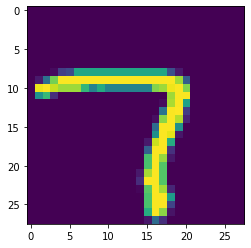

In [14]:
plt.imshow(x_train[15200])

In [16]:
x_train_normalized = x_train / 255 
x_test_normalized = x_test / 255 
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [18]:
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 21us/sample - loss: 1.0215 - accuracy: 0.6953 - val_loss: 0.3479 - val_accuracy: 0.8975
Epoch 2/50
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3580 - accuracy: 0.8932 - val_loss: 0.2423 - val_accuracy: 0.9302
Epoch 3/50
48000/48000 [==============================] - 0s 10us/sample - loss: 0.2461 - accuracy: 0.9282 - val_loss: 0.1904 - val_accuracy: 0.9459
Epoch 4/50
48000/48000 [==============================] - 0s 10us/sample - loss: 0.1944 - accuracy: 0.9429 - val_loss: 0.1573 - val_accuracy: 0.9542
Epoch 5/50
48000/48000 [==============================] - 1s 11us/sample - loss: 0.1602 - accuracy: 0.9531 - val_loss: 0.1418 - val_accuracy: 0.9589
Epoch 6/50
48000/48000 [==============================] - 1s 11us/sample - loss: 0.1359 - accuracy: 0.9604 - val_loss: 0.1329 - val_accuracy: 0.9596
Epoch 7/50
48000/48000 [==============================] 

[0.08193659484386444, 0.9808]

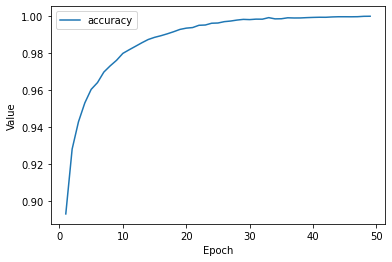

In [38]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    
     # Define the second hidden layer.   
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    
#      # Define the third hidden layer.   
#     model.add(tf.keras.layers.Dense(units=64, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

    return model    


def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)